In [4]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os 
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.preprocessing import image
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input



In [5]:
drive.mount('/content/drive')

# set the pre-trained model to use
pretrained_model = 'MobileNetV2'

# set the input shape for the pre-trained model
input_shape = (224, 224, 3)

# load the pre-trained model with imagenet weights
base_model = tf.keras.applications.__dict__[pretrained_model](
    include_top=False, weights='imagenet', input_shape=input_shape
)

# add new classification layers to the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# set the layers in the base model to be non-trainable
for layer in base_model.layers:
    layer.trainable = False

# compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# set up data augmentation for training and validation data
train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# load the training and test data from your Google Drive
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/train',
        target_size=input_shape[:2],
        batch_size=32,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/test',
        target_size=input_shape[:2],
        batch_size=32,
        shuffle=False)

# train the model for 10 epochs with the training data and validate with the validation data
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# evaluate the model on the validation data and print the classification report and confusion matrix
test_generator.reset()
val_pred = model.predict(test_generator)
val_pred = np.argmax(val_pred, axis=1)
val_true = test_generator.classes
print(classification_report(val_true, val_pred))
print(confusion_matrix(val_true, val_pred))


Mounted at /content/drive
9406464/9406464 [==============================] - 0s 0us/step
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 170s 9s/step - loss: 0.4737 - accuracy: 0.7899 - val_loss: 0.2013 - val_accuracy: 0.9286
Epoch 2/10
18/18 [==============================] - 46s 3s/step - loss: 0.1964 - accuracy: 0.9246 - val_loss: 0.1581 - val_accuracy: 0.9571
Epoch 3/10
18/18 [==============================] - 49s 3s/step - loss: 0.1496 - accuracy: 0.9479 - val_loss: 0.1315 - val_accuracy: 0.9714
Epoch 4/10
18/18 [==============================] - 49s 3s/step - loss: 0.1034 - accuracy: 0.9695 - val_loss: 0.0973 - val_accuracy: 0.9857
Epoch 5/10
18/18 [==============================] - 49s 3s/step - loss: 0.1002 - accuracy: 0.9659 - val_loss: 0.0828 - val_accuracy: 0.9786
Epoch 6/10
18/18 [==============================] - 50s 3s/step - loss: 0.0490 - accuracy: 0.9838 - val_loss: 0.0789 - val_accur

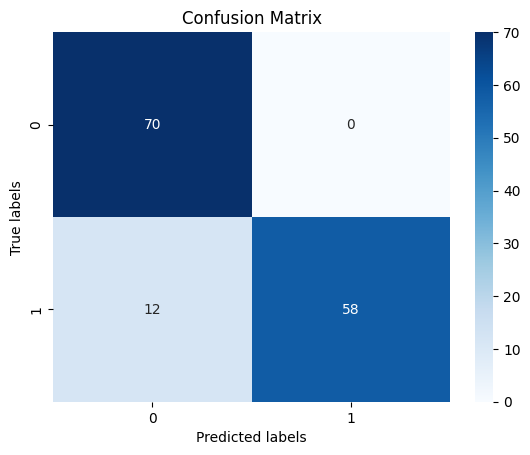

In [8]:
import seaborn as sns

# compute the confusion matrix
conf_matrix = confusion_matrix(val_true, val_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


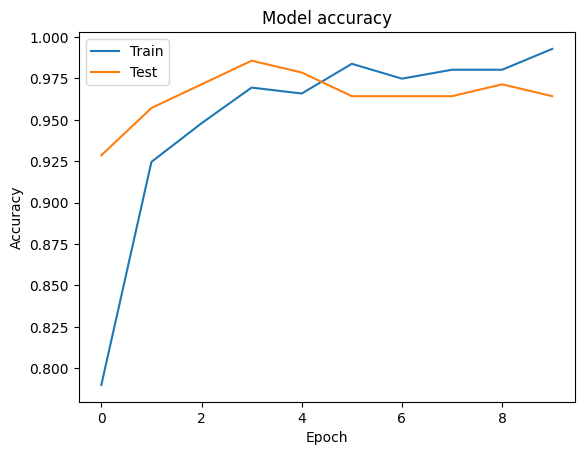

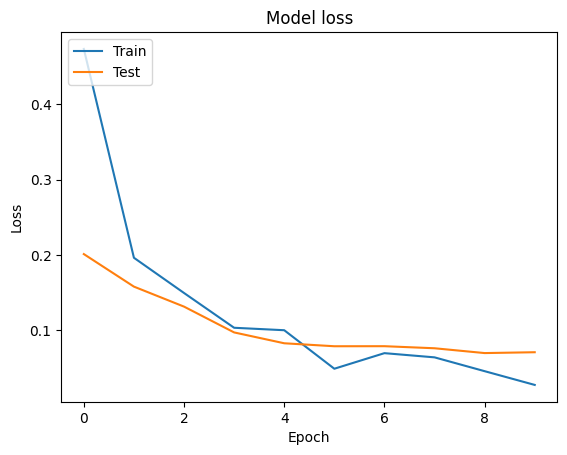

In [6]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [7]:
drive.mount('/content/drive')

# set the pre-trained model to use
pretrained_model = 'InceptionV3'

# set the input shape for the pre-trained model
input_shape = (224, 224, 3)

# load the pre-trained model with imagenet weights
base_model = tf.keras.applications.__dict__[pretrained_model](
    include_top=False, weights='imagenet', input_shape=input_shape
)

# add new classification layers to the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# set the layers in the base model to be non-trainable
for layer in base_model.layers:
    layer.trainable = False

# compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# set up data augmentation for training and validation data
train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# load the training and test data from your Google Drive
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/train',
        target_size=input_shape[:2],
        batch_size=32,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110/cats_and_dogs/test',
        target_size=input_shape[:2],
        batch_size=32,
        shuffle=False)

# train the model for 3 epochs with the training data and validate with the validation data
history = model.fit(train_generator, epochs=3, validation_data=test_generator)

# evaluate the model on the validation data and print the classification report and confusion matrix
test_generator.reset()
val_pred = model.predict(test_generator)
val_pred = np.argmax(val_pred, axis=1)
val_true = test_generator.classes
print(classification_report(val_true, val_pred))
print(confusion_matrix(val_true, val_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
87910968/87910968 [==============================] - 0s 0us/step
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/3
18/18 [==============================] - 120s 6s/step - loss: 0.4192 - accuracy: 0.8241 - val_loss: 0.3147 - val_accuracy: 0.8357
Epoch 2/3
18/18 [==============================] - 108s 6s/step - loss: 0.1565 - accuracy: 0.9443 - val_loss: 0.2674 - val_accuracy: 0.8786
Epoch 3/3
5/5 [==============================] - 20s 4s/step
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        70
           1       1.00      0.83      0.91        70

    accuracy                           0.91       140
   macro avg       0.93      0.91      0.91       140
weighted avg       0.93      0.91      0.91       140

[[70  0]
 [12 58]]


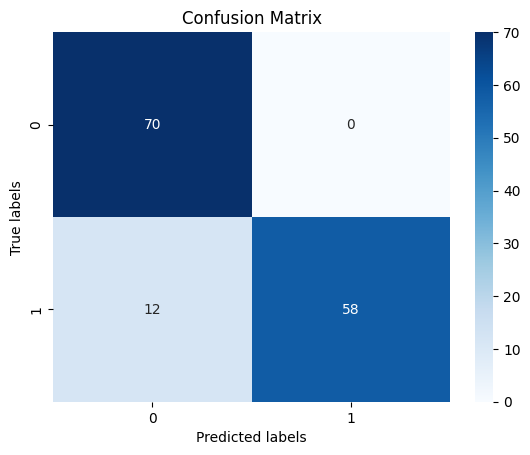

In [9]:
import seaborn as sns
# compute the confusion matrix
conf_matrix = confusion_matrix(val_true, val_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

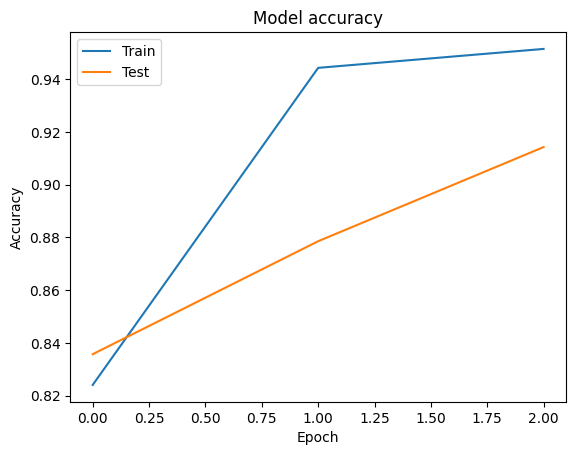

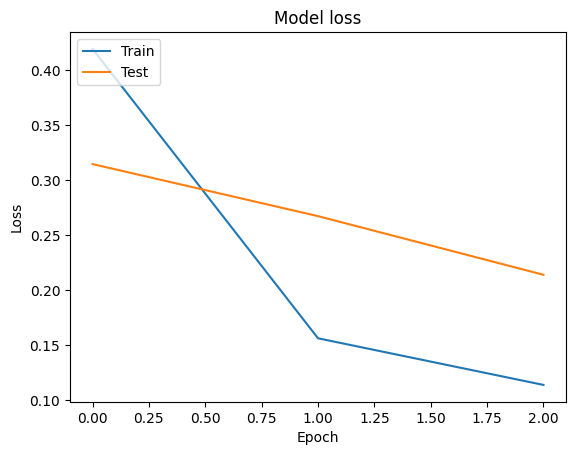

In [10]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
